In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_excel('../../data/raw/OMIEC_NEUROMORPHIC_20_08_24.xls')

In [3]:
# Download necessary NLTK data
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.1

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def preprocess_text(self, text):
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        df = df.apply(self.preprocess_text)
        return df


In [4]:
if __name__ == "__main__":

    preprocessor = TextPreprocessor()
    df_tst = preprocessor.preprocess_dataframe(df['Abstract'])
    print(df_tst)

0      Organic electrochemical transistor promising t...
1      Organic mixed conductor OMIECs efficiently cou...
2      Organic mixed conductor OMIECs emerged promisi...
3      field organic mixed conductor OMIECs gained si...
4      Operational stability underpins successful app...
                             ...                        
110    recent year organic electrochemical transistor...
111    Organic electrochemical transistor OECTs make ...
112    Owing potential advantage processing fabricati...
113    Due similar transmission characteristic biolog...
114    Synaptic plasticity function play crucial role...
Name: Abstract, Length: 115, dtype: object


### Testes

In [26]:
import pandas as pd
from IPython.display import display, Markdown
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming the necessary NLTK data is already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.2

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def normalize_text(self, text):
        # Regex to find acronyms, plural acronyms, and hyphenated acronyms
        acronyms = re.findall(r'\b[A-Z]{2,}(?:[sS]|[A-Z]*-[a-z]+)?\b', text)

        # Convert the entire text to lowercase
        text = text.lower()

        # Restore the original case for acronyms and their variations
        for acronym in acronyms:
            text = re.sub(re.escape(acronym.lower()), acronym, text)

        return text

    def preprocess_text(self, text):
        text = self.normalize_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        df = df.apply(self.preprocess_text)
        return df
    
    def show_abstract(self, df, index):
        return display(Markdown(df[index]))

In [3]:
import pandas as pd
from IPython.display import display, Markdown
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming the necessary NLTK data is already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.3

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def normalize_text(self, text):
        # Handle specific domain-related edge cases
        text = re.sub(r'\bv-OECTs\b', 'vertical-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bv-\s*OECTs\b', 'vertical-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp-OECTs\b', 'parallel-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp-\s*OECTs\b', 'parallel-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp-\s+(and)', r'p-type \1', text)
        text = re.sub(r'\bn-\s+(and)', r'n-type \1', text)
        text = re.sub(r'OECTs', r'OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'OMIECs', r'OMIEC', text, flags=re.IGNORECASE)
        
        # Regex to find acronyms, plural acronyms, and hyphenated acronyms
        acronyms = re.findall(r'\b[A-Z]{2,}(?:[sS]|[A-Z]*-[a-z]+)?\b', text)

        # Convert the entire text to lowercase
        text = text.lower()

        # Restore the original case for acronyms and their variations
        for acronym in acronyms:
            text = re.sub(re.escape(acronym.lower()), acronym, text)

        return text

    def preprocess_text(self, text):
        text = self.normalize_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        df = df.apply(self.preprocess_text)
        return df
    
    def show_abstract(self, df, index):
        return display(Markdown(df[index]))


In [21]:
import pandas as pd
from IPython.display import display, Markdown
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming the necessary NLTK data is already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.4

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def normalize_text(self, text):
        # Handle specific domain-related edge cases
        text = re.sub(r'\bv-OECTs\b', 'vertical-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bv-\s*OECTs\b', 'vertical-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp-OECTs\b', 'parallel-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp-\s*OECTs\b', 'parallel-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp-\s+(and)', r'p-type \1', text)
        text = re.sub(r'\bn-\s+(and)', r'n-type \1', text)
        text = re.sub(r'OECTs', r'OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'OMIECs', r'OMIEC', text, flags=re.IGNORECASE)
        
        # Refined regex to remove measurement units in OMIEC, OECT, and neuromorphic contexts
        # This pattern matches numeric values followed by common measurement units
        text = re.sub(r'\b\d+(\.\d+)?\s*(k?g|mg|µg|ng|pg|cm|mm|µm|nm|pm|m|l|ml|s|ms|µs|ns|ps|K|°C|°F|V|mV|µV|A|mA|µA|Ω|kΩ|MΩ|Hz|kHz|MHz|GHz)\b', '', text, flags=re.IGNORECASE)
        
        # Regex to find acronyms, plural acronyms, and hyphenated acronyms
        acronyms = re.findall(r'\b[A-Z]{2,}(?:[sS]|[A-Z]*-[a-z]+)?\b', text)

        # Convert the entire text to lowercase
        text = text.lower()

        # Restore the original case for acronyms and their variations
        for acronym in acronyms:
            text = re.sub(re.escape(acronym.lower()), acronym, text)

        return text

    def preprocess_text(self, text):
        text = self.normalize_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        df = df.apply(self.preprocess_text)
        return df
    
    def show_abstract(self, df, index):
        return display(Markdown(df[index]))

In [3]:
import pandas as pd
from IPython.display import display, Markdown
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming the necessary NLTK data is already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.5

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def normalize_text(self, text):
        # Handle specific domain-related edge cases
        text = re.sub(r'\bv\s*-\s*OECTs\b', 'vertical-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s*OECTs\b', 'parallel-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s*(phenylene)\s*(vinylene)', r'p-\1-\2', text, flags=re.IGNORECASE)
        text = re.sub(r'\bquasi\s*-\s*solid-state\b', 'quasi-solid-state', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s+(and)', r'p-type \1', text)
        text = re.sub(r'\bn\s*-\s+(and)', r'n-type \1', text)
        text = re.sub(r'OECTs', r'OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'OMIECs', r'OMIEC', text, flags=re.IGNORECASE)
        
        # Remove measurement units in OMIEC, OECT, and neuromorphic contexts
        text = re.sub(r'\b\d+(\.\d+)?\s*(k?g|mg|µg|ng|pg|cm|mm|µm|nm|pm|m|l|ml|s|ms|µs|ns|ps|K|°C|°F|V|mV|µV|A|mA|µA|Ω|kΩ|MΩ|Hz|kHz|MHz|GHz|Thz)\b', '', text, flags=re.IGNORECASE)
        
        # Regex to find acronyms, plural acronyms, and hyphenated acronyms
        acronyms = re.findall(r'\b[A-Z]{2,}(?:[sS]|[A-Z]*-[a-z]+)?\b', text)

        # Convert the entire text to lowercase
        text = text.lower()

        # Restore the original case for acronyms and their variations
        for acronym in acronyms:
            text = re.sub(re.escape(acronym.lower()), acronym, text)

        return text

    def preprocess_text(self, text):
        text = self.normalize_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        df = df.apply(self.preprocess_text)
        return df
    
    def show_abstract(self, df, index):
        return display(Markdown(df[index]))

In [ ]:
import pandas as pd
from IPython.display import display, Markdown
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming the necessary NLTK data is already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.6

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def normalize_text(self, text):
        # Handle specific domain-related edge cases
        text = re.sub(r'\bv\s*-\s*OECTs\b', 'vertical-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s*OECTs\b', 'parallel-OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s*(phenylene)\s*(vinylene)', r'p-\1-\2', text, flags=re.IGNORECASE)
        text = re.sub(r'\bquasi\s*-\s*solid-state\b', 'quasi-solid-state', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s+(and)', r'p-type \1', text)
        text = re.sub(r'\bn\s*-\s+(and)', r'n-type \1', text)
        text = re.sub(r'OECTs', r'OECT', text, flags=re.IGNORECASE)
        text = re.sub(r'OMIECs', r'OMIEC', text, flags=re.IGNORECASE)
        
        # Remove measurement units in OMIEC, OECT, and neuromorphic contexts
        text = re.sub(r'\b\d+(\.\d+)?\s*(k?g|mg|µg|ng|pg|cm|mm|µm|nm|pm|m|l|ml|s|ms|µs|ns|ps|K|°C|°F|V|mV|µV|A|mA|µA|Ω|kΩ|MΩ|Hz|kHz|MHz|GHz|Thz)\b', '', text, flags=re.IGNORECASE)
        
        # Regex to find acronyms, plural acronyms, and hyphenated acronyms
        acronyms = re.findall(r'\b[A-Z]{2,}(?:[sS]|[A-Z]*-[a-z]+)?\b', text)

        # Convert the entire text to lowercase
        text = text.lower()

        # Restore the original case for acronyms and their variations
        for acronym in acronyms:
            text = re.sub(re.escape(acronym.lower()), acronym, text)

        return text

    def preprocess_text(self, text):
        text = self.normalize_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        df = df.apply(self.preprocess_text)
        return df
    
    def show_abstract(self, df, index):
        return display(Markdown(df[index]))

In [3]:
import pandas as pd
from IPython.display import display, Markdown
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming the necessary NLTK data is already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.7

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def normalize_text(self, text):
        # Handle specific domain-related edge cases
        text = re.sub(r'\bv\s*-\s*OECTs\b', 'vertical-oect', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s*OECTs\b', 'parallel-oect', text, flags=re.IGNORECASE)
        #text = re.sub(r'\bp\s*-\s*(phenylene)\s*(vinylene)', r'p-\1-\2', text, flags=re.IGNORECASE)
        text = re.sub(r'\bquasi\s*-\s*solid-state\b', 'quasi-solid-state', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s+(and)', r'p-type \1', text)
        text = re.sub(r'\bn\s*-\s+(and)', r'n-type \1', text)
        text = re.sub(r'OECTs', r'oect', text, flags=re.IGNORECASE)
        text = re.sub(r'OMIECs', r'omiec', text, flags=re.IGNORECASE)
        
        # Remove measurement units in OMIEC, OECT, and neuromorphic contexts
        text = re.sub(r'\b\d+(\.\d+)?\s*(k?g|mg|µg|ng|pg|cm|mm|µm|nm|pm|m|l|ml|s|ms|µs|ns|ps|K|°C|°F|V|mV|µV|A|mA|µA|Ω|kΩ|MΩ|Hz|kHz|MHz|GHz|Thz)\b', '', text, flags=re.IGNORECASE)
        
        # Convert the entire text to lowercase
        text = text.lower()

        return text

    def preprocess_text(self, text):
        text = self.normalize_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        df = df.apply(self.preprocess_text)
        return df
    
    def show_abstract(self, df, index):
        return display(Markdown(df[index]))

# Example usage
if __name__ == "__main__":

    preprocessor = TextPreprocessor()
    
    # Preprocess text normally
    df['Processed_Abstract'] = preprocessor.preprocess_dataframe(df['Abstract'])
    print("Processed Abstracts:")
    print(df['Processed_Abstract'])

    preprocessor.show_abstract(df['Processed_Abstract'], 0)


Processed Abstracts:
0      organic electrochemical transistor promising t...
1      organic mixed conductor omiec efficiently coup...
2      organic mixed conductor omiec emerged promisin...
3      field organic mixed conductor omiec gained sig...
4      operational stability underpins successful app...
                             ...                        
110    recent year organic electrochemical transistor...
111    organic electrochemical transistor oect make e...
112    owing potential advantage processing fabricati...
113    due similar transmission characteristic biolog...
114    synaptic plasticity function play crucial role...
Name: Processed_Abstract, Length: 115, dtype: object


organic electrochemical transistor promising technology bioelectronic device application neuromorphic computing healthcare active component enabling organic electrochemical transistor organic mixed conductor whose optimization critical realizing device study influence purity molecular weight examined polythiophene naphthalene polymer improving performance safety organic electrochemical transistor preparative gpc purification reduced pd content polymer improved organic electrochemical transistor mobility similar material respectively finding demonstrate paramount importance removing residual pd concluded critical optimization polymer molecular weight improve organic electrochemical transistor performance readily available improvement performance stability many reported organic mixed conductor

Processed Abstracts:
0      organic electrochemical transistor promising t...
1      organic mixed conductor omiec efficiently coup...
2      organic mixed conductor omiec emerged promisin...
3      field organic mixed conductor omiec gained sig...
4      operational stability underpins successful app...
                             ...                        
110    recent year organic electrochemical transistor...
111    organic electrochemical transistor oect make e...
112    owing potential advantage processing fabricati...
113    due similar transmission characteristic biolog...
114    synaptic plasticity function play crucial role...
Name: Processed_Abstract, Length: 115, dtype: object

Top TF-IDF words for each document:
[['pd', 'organic', 'molecular', 'weight', 'optimization'], ['ps', 'mel', 'omiec', 'pedot', 'supercaps'], ['pl', 'crystalline', 'region', 'amorphous', 'initial'], ['omiec', 'transport', 'ionic', 'stimulus', 'application'], ['density', 'structural', 'carrier', 'ch

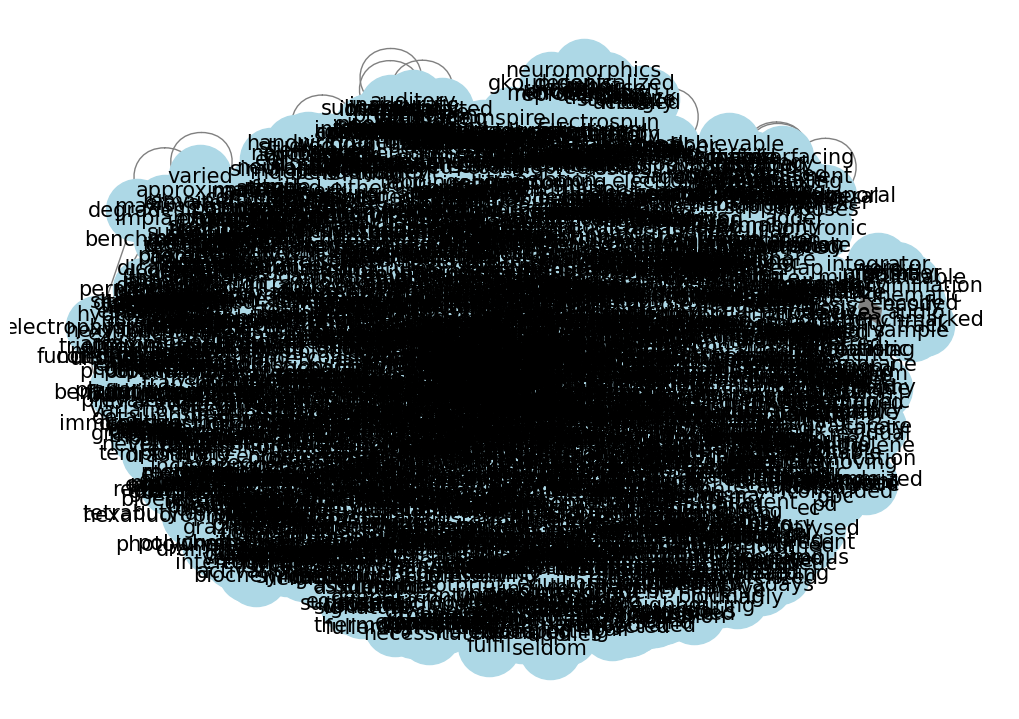

In [6]:
import pandas as pd
from IPython.display import display, Markdown
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
from nltk import pos_tag, ne_chunk
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Assuming the necessary NLTK data is already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.version = 0.7

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]

    def remove_special_characters(self, tokens):
        return [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]

    def lemmatize(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def normalize_text(self, text):
        # Handle specific domain-related edge cases
        text = re.sub(r'\bv\s*-\s*OECTs\b', 'vertical-oect', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s*OECTs\b', 'parallel-oect', text, flags=re.IGNORECASE)
        text = re.sub(r'\bquasi\s*-\s*solid-state\b', 'quasi-solid-state', text, flags=re.IGNORECASE)
        text = re.sub(r'\bp\s*-\s+(and)', r'p-type \1', text)
        text = re.sub(r'\bn\s*-\s+(and)', r'n-type \1', text)
        text = re.sub(r'OECTs', r'oect', text, flags=re.IGNORECASE)
        text = re.sub(r'OMIECs', r'omiec', text, flags=re.IGNORECASE)
        
        # Remove measurement units in OMIEC, OECT, and neuromorphic contexts
        text = re.sub(r'\b\d+(\.\d+)?\s*(k?g|mg|µg|ng|pg|cm|mm|µm|nm|pm|m|l|ml|s|ms|µs|ns|ps|K|°C|°F|V|mV|µV|A|mA|µA|Ω|kΩ|MΩ|Hz|kHz|MHz|GHz|Thz)\b', '', text, flags=re.IGNORECASE)
        
        # Convert the entire text to lowercase
        text = text.lower()

        return text

    def preprocess_text(self, text):
        text = self.normalize_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.remove_special_characters(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

    def preprocess_dataframe(self, df):
        return df.apply(self.preprocess_text)

    def apply_tfidf(self, processed_texts):
        # Apply TF-IDF
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(processed_texts)
        feature_names = vectorizer.get_feature_names_out()
        return tfidf_matrix, feature_names

    def get_top_tfidf_words(self, tfidf_matrix, feature_names, top_n=5):
        # Get top N words with highest TF-IDF score for each document
        top_words = []
        for i in range(tfidf_matrix.shape[0]):
            row = tfidf_matrix[i].toarray().flatten()
            top_indices = np.argsort(row)[-top_n:]
            top_words.append([feature_names[j] for j in reversed(top_indices)])
        return top_words

    def perform_ner(self, text):
        """Perform POS tagging and extract entities."""
        tokens = self.tokenize(text)
        pos_tags = pos_tag(tokens)  # Perform POS tagging
        return pos_tags

    def filter_text_by_pos(self, text, pos_tags_to_keep):
        """Filter text based on POS tags."""
        tokens = self.tokenize(text)
        pos_tags = pos_tag(tokens)
        filtered_tokens = [word for word, pos in pos_tags if pos in pos_tags_to_keep]
        return ' '.join(filtered_tokens)

    def build_cooccurrence_graph(self, texts):
        """Build and display a co-occurrence graph from the list of texts."""
        graph = nx.Graph()
        
        for text in texts:
            tokens = self.tokenize(text)
            for i, token in enumerate(tokens):
                for j in range(i + 1, len(tokens)):
                    graph.add_edge(token, tokens[j])

        # Draw the graph
        plt.figure(figsize=(10, 7))
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
        plt.show()

# Example usage
if __name__ == "__main__":

    preprocessor = TextPreprocessor()

    # Preprocess text
    df['Processed_Abstract'] = preprocessor.preprocess_dataframe(df['Abstract'])
    print("Processed Abstracts:")
    print(df['Processed_Abstract'])

    # Apply TF-IDF
    tfidf_matrix, feature_names = preprocessor.apply_tfidf(df['Processed_Abstract'])

    # Get top TF-IDF words
    top_words = preprocessor.get_top_tfidf_words(tfidf_matrix, feature_names, top_n=5)
    print("\nTop TF-IDF words for each document:")
    print(top_words)

    # Perform POS tagging on top TF-IDF words
    pos_tags_to_keep = set()
    for words in top_words:
        for word in words:
            pos_tags = preprocessor.perform_ner(word)
            pos_tags_to_keep.update([pos for _, pos in pos_tags])

    print(pos_tags_to_keep)  

    # Filter texts based on POS tags
    df['Filtered_Abstract'] = df['Processed_Abstract'].apply(lambda text: preprocessor.filter_text_by_pos(text, pos_tags_to_keep))
    print("\nFiltered Abstracts:")
    print(df['Filtered_Abstract'])

    # Build and display the co-occurrence graph
    preprocessor.build_cooccurrence_graph(df['Filtered_Abstract'])


In [4]:
if __name__ == "__main__":

    preprocessor = TextPreprocessor()
    df_tst = preprocessor.preprocess_dataframe(df['Abstract'])
    print(df_tst)

0      organic electrochemical transistor promising t...
1      organic mixed conductor omiec efficiently coup...
2      organic mixed conductor omiec emerged promisin...
3      field organic mixed conductor omiec gained sig...
4      operational stability underpins successful app...
                             ...                        
110    recent year organic electrochemical transistor...
111    organic electrochemical transistor oect make e...
112    owing potential advantage processing fabricati...
113    due similar transmission characteristic biolog...
114    synaptic plasticity function play crucial role...
Name: Abstract, Length: 115, dtype: object
